In [1]:
import paths
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
expfolder = (paths.results / "sample_derivatives") / "SPAMS_DictLr_Ncomps-4_PosCode-False_PosAtoms-True_Niters-600_Ninits-15_Alpha-2.0_Tvalue-15_Act-pos_n-3/"
components = np.load(expfolder / paths.dictcomps_npy_name)
assignments = pd.read_pickle(expfolder / paths.comp_assignments_df_name).reset_index(level="frame_time")
display(components.shape)
assignments


(4, 23662)

block                     frame_time RetainedFrames    DictComp              \
                                               type           0           1   
subj_name       ses_name                                                      
sub-CC00063AN06 ses-15102          4           high    8.907621  -12.538981   
                ses-15102         10           high   21.778983    0.000000   
                ses-15102         11           high   22.348431    0.000000   
                ses-15102         12           high    0.000000   14.074931   
                ses-15102         13           high   11.739572    0.000000   
...                              ...            ...         ...         ...   
sub-CC00068XX11 ses-20701       2182           high   37.000558    0.000000   
                ses-20701       2191           high    0.000000   25.662475   
                ses-20701       2192           high   29.144957  -14.348902   
                ses-20701       2198           high    0.000000    0.000000   
                ses-20701       2246           high -139.448838  132.168431   

block                                            
                                   2          3  
subj_name       ses_name                         
sub-CC00063AN06 ses-15102   0.000000   0.000000  
                ses-15102   0.000000 -22.842098  
                ses-15102   0.000000 -21.019599  
                ses-15102 -13.664825   0.000000  
                ses-15102 -17.829844   0.000000  
...                              ...        ...  
sub-CC00068XX11 ses-20701   0.000000 -31.691662  
                ses-20701 -13.617317   0.000000  
                ses-20701   0.000000   0.000000  
                ses-20701 -16.953761  25.164844  
                ses-20701   0.000000   0.000000  

[1029 rows x 6 columns]

In [3]:
subjs_infos = paths.bids_root / "combined.tsv"
subjs_infos = pd.read_csv(subjs_infos, sep="\t")
subjs_infos['subj_name'] = subjs_infos['participant_id'].apply(lambda x: f"sub-{x}")
subjs_infos['ses_name'] = subjs_infos['session_id'].apply(lambda x: f"ses-{x}")
subjs_infos = subjs_infos.set_index(["subj_name", "ses_name"]).drop(columns=['participant_id', 'session_id'])
subjs_infos.columns = pd.MultiIndex.from_product([['metadata'], subjs_infos.columns])


assignments_metadata_df = assignments.join(subjs_infos, how='left')
assignments_metadata_df

frame_time RetainedFrames    DictComp              \
                                               type           0           1   
subj_name       ses_name                                                      
sub-CC00063AN06 ses-15102          4           high    8.907621  -12.538981   
                ses-15102         10           high   21.778983    0.000000   
                ses-15102         11           high   22.348431    0.000000   
                ses-15102         12           high    0.000000   14.074931   
                ses-15102         13           high   11.739572    0.000000   
...                              ...            ...         ...         ...   
sub-CC00068XX11 ses-20701       2182           high   37.000558    0.000000   
                ses-20701       2191           high    0.000000   25.662475   
                ses-20701       2192           high   29.144957  -14.348902   
                ses-20701       2198           high    0.000000    0.000000   
                ses-20701       2246           high -139.448838  132.168431   

                                                   metadata            \
                                   2          3 scan_number singleton   
subj_name       ses_name                                                
sub-CC00063AN06 ses-15102   0.000000   0.000000           1         M   
                ses-15102   0.000000 -22.842098           1         M   
                ses-15102   0.000000 -21.019599           1         M   
                ses-15102 -13.664825   0.000000           1         M   
                ses-15102 -17.829844   0.000000           1         M   
...                              ...        ...         ...       ...   
sub-CC00068XX11 ses-20701   0.000000 -31.691662           1         S   
                ses-20701 -13.617317   0.000000           1         S   
                ses-20701   0.000000   0.000000           1         S   
                ses-20701 -16.953761  25.164844           1         S   
                ses-20701   0.000000   0.000000           1         S   

                                               ...                        \
                          sedation  birth_age  ... qc_fmri_fieldmap_type   
subj_name       ses_name                       ...                         
sub-CC00063AN06 ses-15102    False  35.142857  ...         spin_echo_epi   
                ses-15102    False  35.142857  ...         spin_echo_epi   
                ses-15102    False  35.142857  ...         spin_echo_epi   
                ses-15102    False  35.142857  ...         spin_echo_epi   
                ses-15102    False  35.142857  ...         spin_echo_epi   
...                            ...        ...  ...                   ...   
sub-CC00068XX11 ses-20701    False  40.428571  ...         spin_echo_epi   
                ses-20701    False  40.428571  ...         spin_echo_epi   
                ses-20701    False  40.428571  ...         spin_echo_epi   
                ses-20701    False  40.428571  ...         spin_echo_epi   
                ses-20701    False  40.428571  ...         spin_echo_epi   

                                                                               \
                          qc_fmri_dvars_z qc_fmri_tsnr_z qc_fmri_mcdc2sbref_z   
subj_name       ses_name                                                        
sub-CC00063AN06 ses-15102        0.603226       0.948931             0.270261   
                ses-15102        0.603226       0.948931             0.270261   
                ses-15102        0.603226       0.948931             0.270261   
                ses-15102        0.603226       0.948931             0.270261   
                ses-15102        0.603226       0.948931             0.270261   
...                                   ...            ...                  ...   
sub-CC00068XX11 ses-20701        0.216294      -0.319705             0.121056   
                ses-2

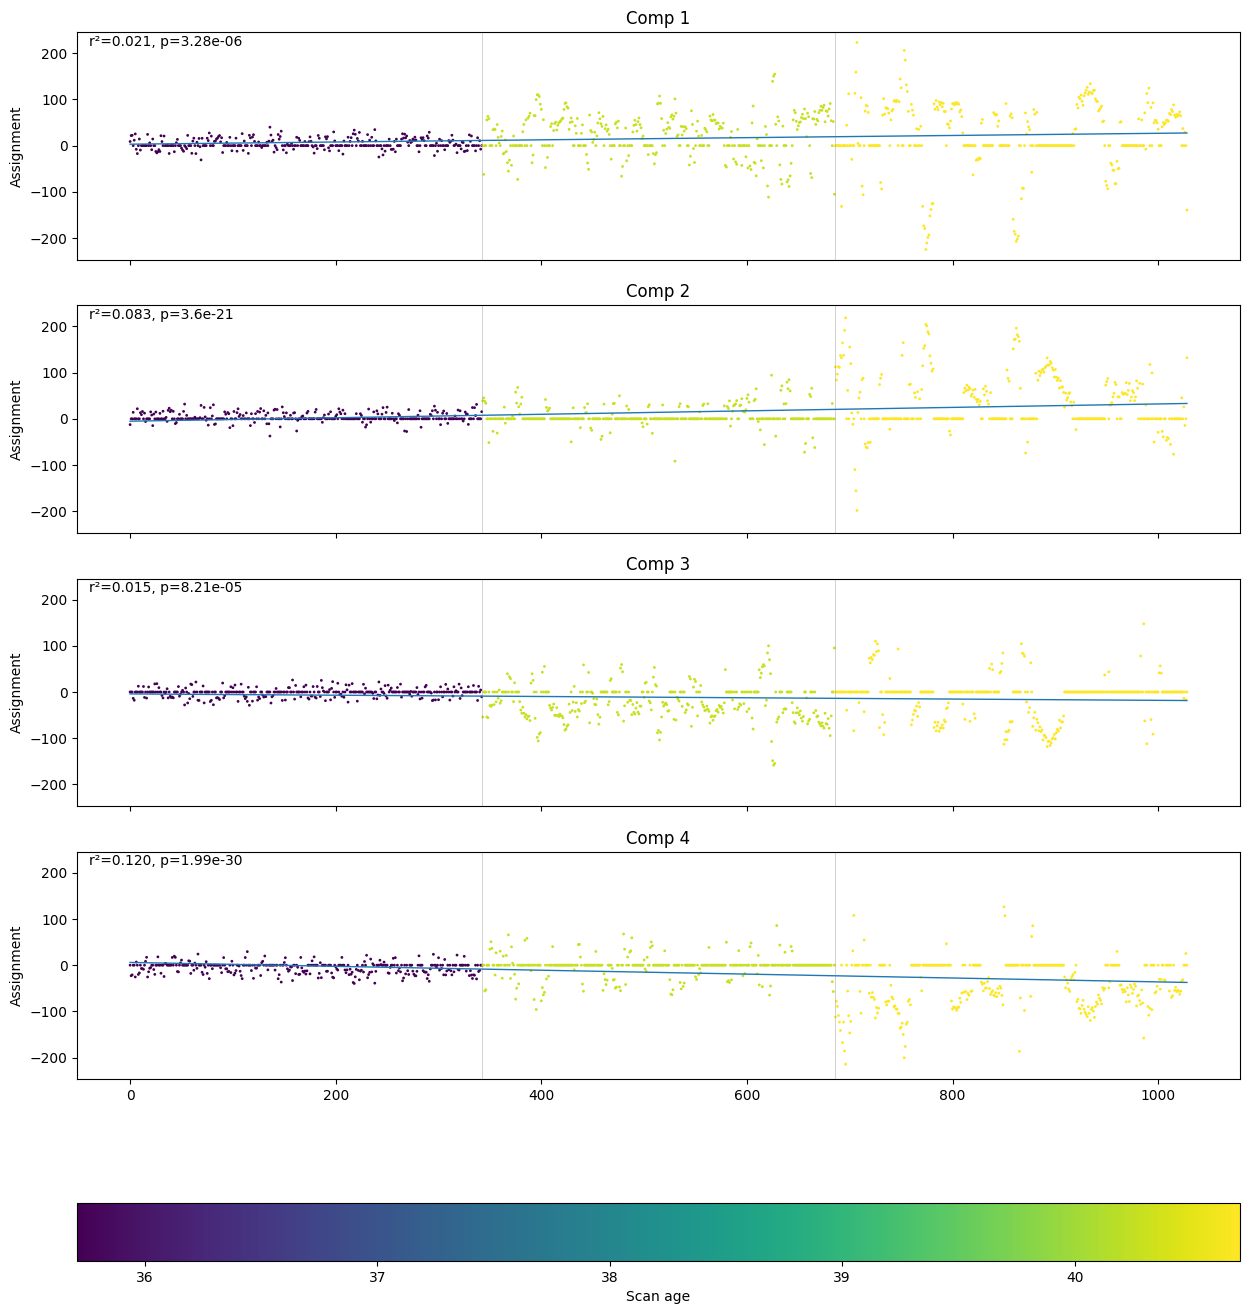

In [7]:
from scipy.stats import linregress

n_comps = components.shape[0]

fig, axes = plt.subplots(n_comps, 1, figsize=(15, 4 * n_comps), sharex=True, sharey=True)

age_sorted_assignments = assignments_metadata_df.sort_values(('metadata', 'scan_age'))

age_sorted_assignments = assignments_metadata_df.sort_values(by=[
    ('metadata', 'scan_age'),
    'subj_name'
])


codes = age_sorted_assignments["metadata", "scan_age"].values
subjects = age_sorted_assignments.index.get_level_values("subj_name")
change_points = np.where(subjects[:-1] != subjects[1:])[0] + 0.5



x = np.arange(len(codes))

for ax, comp in zip(axes, age_sorted_assignments["DictComp"].columns):
    y = age_sorted_assignments["DictComp"][comp].values

    sc = ax.scatter(x, y, c=codes, s=1)
    # sc = ax.plot(x, y )#c=codes, s=1)
    ax.set_ylabel("Assignment")
    ax.set_title(f"Comp {comp+1}")

    slope, intercept, r, p, stderr = linregress(x, y)
    r2 = r ** 2
    ax.plot(x, slope*x + intercept, linewidth=1)


    ax.text(0.01, 0.99,
            f"r²={r2:.3f}, p={p:.3g}",
            transform=ax.transAxes,
            va="top", ha="left")


    for cp in change_points:
        ax.axvline(cp, color="gray", linewidth=0.5, alpha=0.5)


cbar = fig.colorbar(sc, ax=axes.ravel().tolist(), orientation="horizontal", fraction=0.05, pad=0.1)
cbar.set_label("Scan age")
plt.show()


<Axes: xlabel='subj_name,ses_name'>

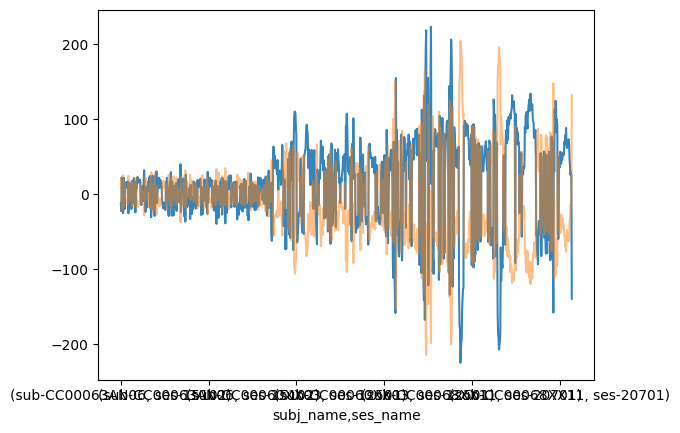

In [44]:
# plt.figure(figsize=(15,15))
age_sorted_assignments["DictComp"].apply(lambda row: row.loc[row.abs().sort_values(ascending=False).index[0]] , axis=1).plot(alpha=0.9)
age_sorted_assignments["DictComp"].apply(lambda row: row.loc[row.abs().sort_values(ascending=False).index[1]] , axis=1).plot(alpha=0.5)

<Axes: xlabel='subj_name,ses_name'>

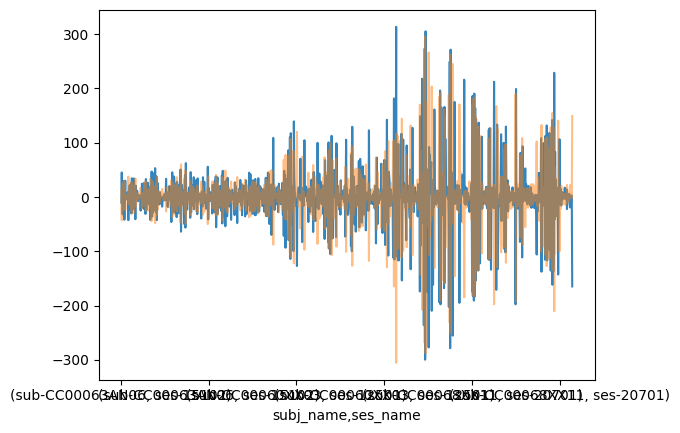

In [43]:
# plt.figure(figsize=(15,15))
age_sorted_assignments["DictComp"].apply(lambda row: row.loc[row.abs().sort_values(ascending=False).index[0]] , axis=1).diff().plot(alpha=0.9)
age_sorted_assignments["DictComp"].apply(lambda row: row.loc[row.abs().sort_values(ascending=False).index[1]] , axis=1).diff().plot(alpha=0.5)

<Axes: xlabel='subj_name,ses_name'>

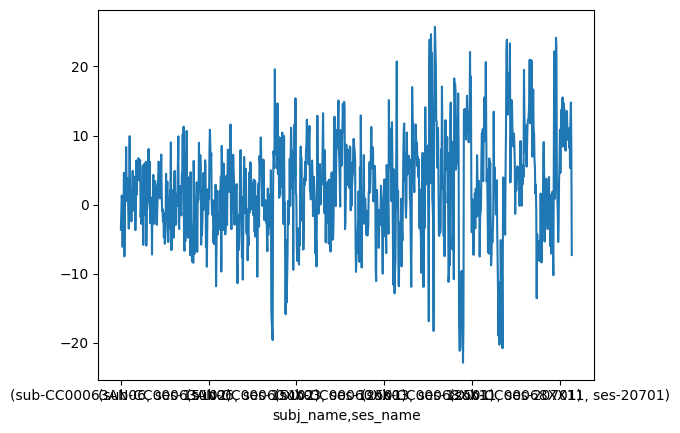

In [23]:
age_sorted_assignments["DictComp"].sum(axis=1).plot()

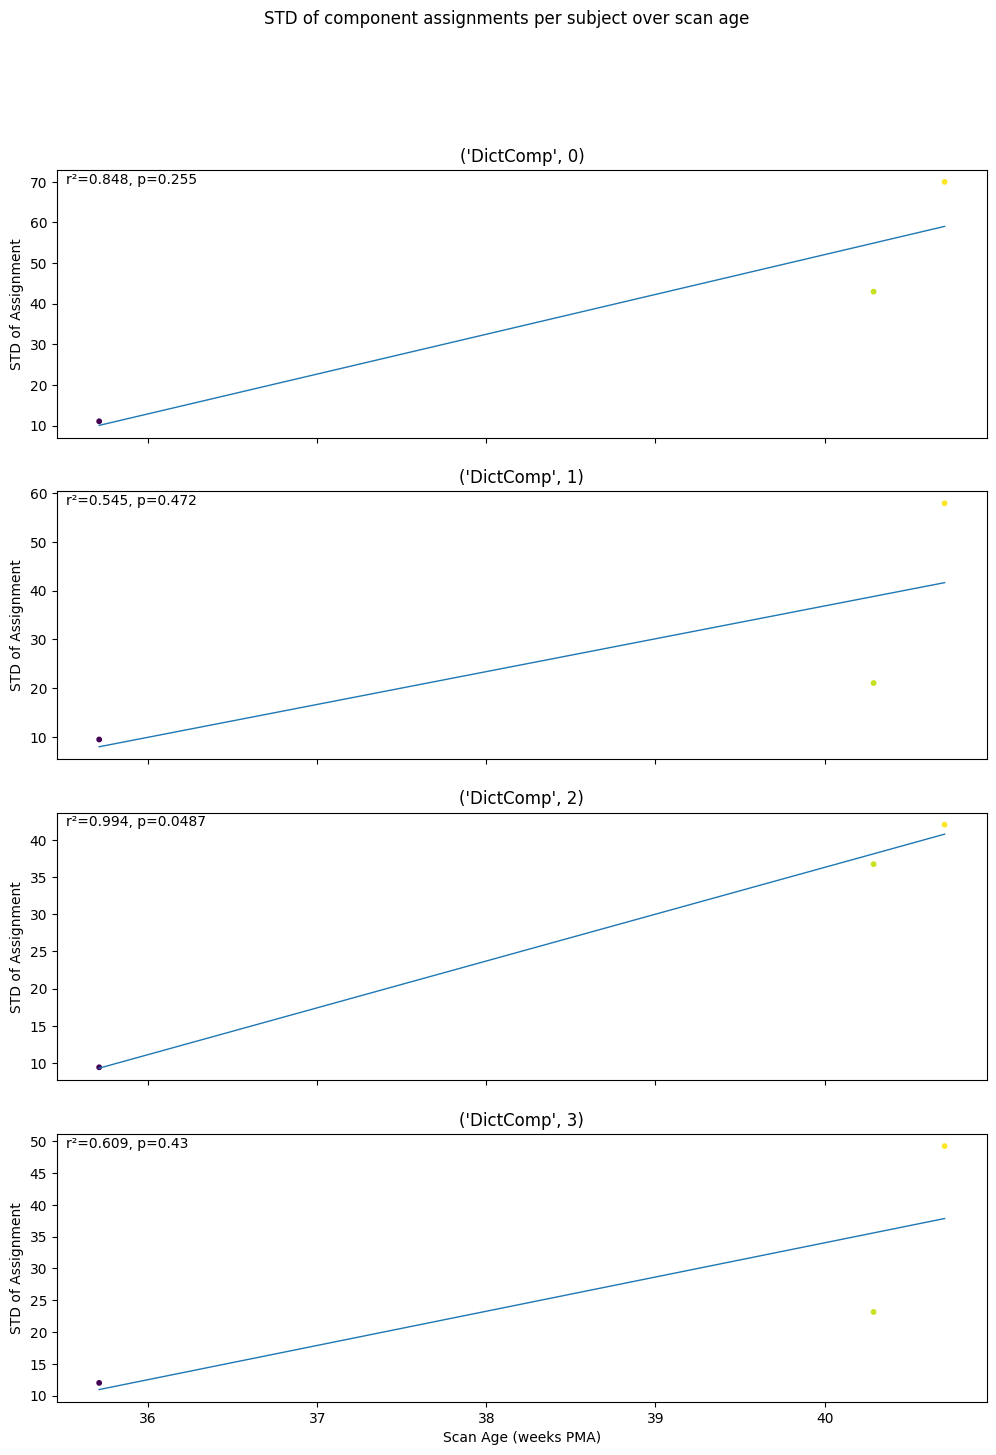

In [5]:
subjGrouped_ageSorted_assignments = age_sorted_assignments.groupby(
    level=['subj_name', 'ses_name'],
    sort=False
)["DictComp"]

fig, axes = plt.subplots(components.shape[0], 1, figsize=(12, 4 * components.shape[0]), sharex=True)
for ax,(comp_idx, comp_value) in zip(axes, subjGrouped_ageSorted_assignments.std().T.iterrows()):
    scan_ages = age_sorted_assignments["metadata", 'scan_age'].groupby(
        level=['subj_name', 'ses_name'],
        sort=False
    ).first().values
    ax.scatter(scan_ages, comp_value, s=10, c=scan_ages)


    slope, intercept, r, p, stderr = linregress(scan_ages, comp_value)
    r2 = r ** 2
    ax.plot(scan_ages, slope*scan_ages + intercept, linewidth=1)


    ax.text(0.01, 0.99,
            f"r²={r2:.3f}, p={p:.3g}",
            transform=ax.transAxes,
            va="top", ha="left")

    ax.set_ylabel("STD of Assignment")
    ax.set_title(f"{comp_idx}")
fig.suptitle("STD of component assignments per subject over scan age")
plt.xlabel("Scan Age (weeks PMA)")
plt.show()